<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>

# How to train YOLO v7 with Ikomia API

Object detection is an important task in Computer Vision. Lots of companies use this technology:


*   **Smart city** : crowd analysis or infrastructure inspection
*   **Retail** : inventory tracking or customer tracking
*   **Autonomous vehicles** : vehicle or pedestrian detection
*   **Security** : facial recognition or potential threats detection
*   **Manufacturing** : quality control or defect detection
*   **Healthcare** : many disease recognition

If you are familiar with object detection, you know that there exists a lot of algorithms and the latest, **YOLO v7** is one of the most **powerful** at this time of writing.

I will not describe the algorithm because you can already find some good articles on the web. You just need to know that YOLO v7 is very fast (real time processing) and accurate. 

The main bottleneck for many developers is...how can I use this technology in my own problem ?

In this tutorial, I show you how it can be EASY to create your own object detector thanks to Ikomia API.

Paper : [YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors](https://arxiv.org/abs/2207.02696)

Code : [GitHub repository](https://github.com/wongkinyiu/yolov7)

If you like this tutorial, you can support our project here [Ikomia API GitHub](https://github.com/Ikomia-dev/IkomiaApi)

ENJOY 🥰 !!

<p float="left">
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_foot.png?raw=true" width="500" /> 
  <img src="https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/img_foot_bbox.png?raw=true" width="500" />
</p>

## Setup

Please use a GPU for this tutorial.

In the menu, select "Runtime" then "Change runtime type", choose GPU in "Hardware accelerator".

Check your GPU with the following command:

In [1]:
!nvidia-smi

Tue Oct 25 12:26:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 495.46       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| N/A   49C    P8     9W /  N/A |   2572MiB /  5934MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

First of all, you need to install Ikomia API pip package.

In [2]:
!pip install ikomia

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/home/yom/Developpement/python_venv/python3.7/bin/python -m pip install --upgrade pip' command.




---


**-Google Colab ONLY- Restart runtime**

Click on the "RESTART RUNTIME" button at the end the previous window.





---

Use your credentials to connect with Ikomia HUB and access more than 60 algorithms and 800+ models.

Your credentials are the same as you use to login to our website, if you don't have any credentials, follow this link

https://members.ikomia.com/accounts/signup/

In [3]:
import ikomia
import os

# Easy and unsafe authentication | Only for personal use
os.environ['IKOMIA_USER'] = "your_login"
os.environ['IKOMIA_PWD'] = "your_password"

ikomia.authenticate()

Logging started at 2022-10-25 12:26:32
Ikomia auto-completion updated for Ikomia HUB algorithms.


## How to train YOLO v7 on a custom YOLO dataset

Download your dataset from your preferred tool. In this example, we use a dataset from **Roboflow** which is a great annotation platform used by many developers and companies. The dataset is exported in YOLO format.

In [4]:
!curl -L "https://universe.roboflow.com/ds/997v9b3SK6?key=qTrYR6x8fv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
!cp $(pwd)/valid/* $(pwd)/train/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0    456      0  0:00:01  0:00:01 --:--:--   455
100 3603k  100 3603k    0     0  1444k      0  0:00:02  0:00:02 --:--:-- 10.5M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/1-fps-2_00001_jpeg_jpg.rf.e95412d81fb5fe6dd2b3fb120b41ba1a.jpg  
 extracting: test/1-fps-2_00001_jpeg_jpg.rf.e95412d81fb5fe6dd2b3fb120b41ba1a.txt  
 extracting: test/1-fps-2_00014_jpeg_jpg.rf.a2541cb929e1b22719488740b5a0ad1f.jpg  
 extracting: test/1-fps-2_00014_jpeg_jpg.rf.a2541cb929e1b22719488740b5a0ad1f.txt  
 extracting: test/1-fps-2_00022_jpeg_jpg.rf.81c5748a3929ba5040542c0e6fe39057.jpg  
 extracting: test/1-fps-2_00022_jpeg_jpg.rf.81c5748a3929ba5040542c0e6fe39057.txt  
 extracting: test/1-fps-2_00025_jpeg_jpg.rf.3573cdee6c723239c5089476

In order to train YOLOv7 on your custom dataset, please create a new workflow from scratch.

Then you need 2 components:

1.   A YOLO dataset loader which loads dataset in YOLO format and convert it to an Ikomia format
2.   The YOLOv7 training algorithm which loads dataset in Ikomia format

Add these 2 previous algorithms to your workflow and then it will automagically download all algorithms from Ikomia Hub and install all the Python dependencies (the 1st time, it can take a while, be patient ! ).

** -Google Colab ONLY- ** If you want to monitor your training results, you can use TensorBoard by running the following cell.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /root/Ikomia/Tensorboard

Now, it's time to train your model !

In [5]:
from ikomia.utils import ik
from ikomia.core import task
from ikomia.dataprocess import workflow
import os

#----------------------------- Step 1 -----------------------------------#
# Create a workflow which will take your dataset as input and
# train a YOLOv7 model on it
#------------------------------------------------------------------------#
wf = workflow.create("Train YOLOv7")

#----------------------------- Step 2 -----------------------------------#
# First you need to convert darknet YOLO format to IKOMIA format.
# Add an Ikomia dataset converter to your workflow.
#------------------------------------------------------------------------#
dataset_yolo_id, dataset_yolo = wf.add_task(ik.dataset_yolo)

# Specify where are the data and class file
dataset_yolo_params = {
    ik.dataset_yolo_param.data_folder_path: os.getcwd()+"/train",
    ik.dataset_yolo_param.class_file_path: os.getcwd()+"/train/_darknet.labels"
}
wf.set_parameters(task_id=dataset_yolo_id, params=dataset_yolo_params)

#----------------------------- Step 3 -----------------------------------#
# Then, you want to train a YOLOv7 model.
# Add YOLOv7 training algorithm to your workflow
#------------------------------------------------------------------------#
yolo7_id, yolo7 = wf.add_task(ik.train_yolo_v7)

# Specify where to put the pre-trained model and set hyperparameters
train_yolo_v7_params = {
    ik.train_yolo_v7_param.output_folder: os.getcwd(),
    ik.train_yolo_v7_param.batch_size: 16, # <-- Reduce the batch size if you encounter some "Cuda out of memory"
    ik.train_yolo_v7_param.epochs: 150 
}
wf.set_parameters(task_id=yolo7_id, params=train_yolo_v7_params)


#----------------------------- Step 4 -----------------------------------#
# Connect your tasks I/O (Input/Output).
# In this example, all connections are automatic because "dataset_yolo"
# outputs exactly fit with "train_yolo" inputs
#------------------------------------------------------------------------#
wf.connect_tasks(dataset_yolo_id, yolo7_id)
#----------------------------- Step 5 -----------------------------------#
# Execute your workflow.
# It automatically runs all your tasks sequentially.
#------------------------------------------------------------------------#
wf.run()

MLflow server is started at http://localhost:5000
Tensorboard server is started at http://localhost:6006
Preparing dataset...
A valid YoloV5 dataset structure already exists, skip building a new one
Start training...
YOLOV7 🚀 2022-10-10 torch 1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 2060, 5934.5625MB)

Namespace(adam=False, anchors=[[12, 16, 19, 36, 40, 28], [36, 75, 76, 55, 72, 146], [142, 110, 192, 243, 459, 401]], artifact_alias='latest', backbone=[[-1, 1, 'Conv', [32, 3, 1]], [-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 1, 'Conv', [64, 1, 1]], [-2, 1, 'Conv', [64, 1, 1]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [64, 3, 1]], [-1, 1, 'Conv', [64, 3, 1]], [[-1, -3, -5, -6], 1, 'Concat', [1]], [-1, 1, 'Conv', [256, 1, 1]], [-1, 1, 'MP', []], [-1, 1, 'Conv', [128, 1, 1]], [-3, 1, 'Conv', [128, 1, 1]], [-1, 1, 'Conv', [128, 3, 2]], [[-1, -3], 1, 'Concat', [1]], [-1, 1, 'Conv', [128, 1, 1]], [-2, 1, 'Conv', [1

/home/yom/Developpement/python_venv/python3.7/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Model Summary: 407 layers, 37205480 parameters, 37205480 gradients, 105.1 GFLOPS

Transferred 554/560 items from /home/yom/Ikomia/Plugins/Python/train_yolo_v7/models/yolov7.pt
Scaled weight_decay = 0.0005
Optimizer groups: 95 .bias, 95 conv.weight, 92 other


train: Scanning '/home/yom/Ikomia/Plugins/Python/train_yolo_v7/dataset/labels/train.cache' images and labels... 133 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:00<?, ?it/s]
val: Scanning '/home/yom/Ikomia/Plugins/Python/train_yolo_v7/dataset/labels/val.cache' images and labels... 14 found, 0 missing, 0 empty, 0 corrupted: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<?, ?it/s]



autoanchor: Analyzing anchors... anchors/target = 5.33, Best Possible Recall (BPR) = 1.0000
Image sizes 640 train, 640 test
Using 0 dataloader workers
Logging results to /home/yom/Developpement/notebooks/examples/25-10-2022T12h27m48s
Starting training for 10 epochs...

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       0/9     1.39G   0.06625   0.02772   0.01539    0.1094        47       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:16<00:00,  7.85it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.18it/s]


                 all          14         187     0.00206      0.0141    9.91e-05    1.69e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       1/9     1.97G   0.06914   0.02668   0.01592    0.1117        10       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:14<00:00,  9.17it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 25.04it/s]


                 all          14         187     0.00222      0.0475    0.000157     3.7e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       2/9     1.97G   0.06802   0.02772   0.01566    0.1114        10       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:15<00:00,  8.70it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 21.90it/s]


                 all          14         187     0.00198      0.0141    9.38e-05    1.84e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       3/9     1.97G   0.06995   0.02688   0.01589    0.1127        13       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:15<00:00,  8.42it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.57it/s]


                 all          14         187     0.00418      0.0121     0.00023    4.39e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       4/9     1.97G   0.06611   0.02604   0.01433    0.1065        49       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:15<00:00,  8.74it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 22.78it/s]


                 all          14         187     0.00418      0.0121     0.00023    4.39e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       5/9     1.97G   0.06433   0.02592   0.01455    0.1048        34       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:15<00:00,  8.53it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.32it/s]


                 all          14         187     0.00418      0.0121     0.00023    4.39e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       6/9     1.97G   0.07073   0.02689   0.01624    0.1139         7       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:15<00:00,  8.47it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.34it/s]


                 all          14         187     0.00418      0.0121     0.00023    4.39e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       7/9     1.97G   0.06601   0.02606   0.01508    0.1072        15       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:15<00:00,  8.34it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.64it/s]


                 all          14         187     0.00238      0.0202    0.000161    2.61e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       8/9     1.97G    0.0686   0.02629   0.01592    0.1108        20       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:15<00:00,  8.44it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.86it/s]


                 all          14         187     0.00298      0.0596    0.000285    3.76e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size


       9/9     1.97G   0.06602   0.02629   0.01463    0.1069        22       640: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:16<00:00,  8.22it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.70it/s]


                 all          14         187     0.00282      0.0263    0.000264    4.28e-05
              futbol          14          12           0           0           0           0
              player          14         165     0.00847      0.0788    0.000792    0.000128
            referree          14          10           0           0           0           0
10 epochs completed in 0.047 hours.



## How to execute YOLOv7 on images

Once the training is finished, you may want to experiment the fresh model on new test images. Just use the following code to execute YOLO v7 inference on your image.

In [6]:
from ikomia.dataprocess import workflow, registry
from ikomia.utils import ik
import cv2

# Create your workflow for YOLO inference
wf = workflow.create("YOLOv7 inference")

# Add YOLO v7 to your workflow
yolo7_id, yolo7 = wf.add_task(ik.infer_yolo_v7)

# Set custom parameters
# Uncomment these 6 lines if you want to use your custom model
# yolo7_params = {
#     ik.infer_yolo_v7_param.custom_train: True,
#     ik.infer_yolo_v7_param.custom_model: os.getcwd()+"/folder_name/weights/best.pt", # <-- replace "folder_name" by the correct folder name in your current folder (/content/ for Google Colab)
#     ik.infer_yolo_v7_param.thr_conf: 0.25
# }
# wf.set_parameters(task_id=yolo7_id, params=yolo7_params)

# Connect YOLO v7 with the root task
wf.connect_tasks(wf.getRootID(), yolo7_id)

# Apply YOLO v7 on your image
# By default, YOLOv7 runs with a pre-trained model based on COCO
# To use your custom model, set the parameters above
wf.run_on(path=os.getcwd()+"/train/yt1s-com---Resume-Tottenham-20-West-Bromwich-Premier-League-J23_720p-fps-2_00044_jpeg_jpg.rf.9de8afe0132987f478d16d536e768a67.jpg")

Will run on cuda
Fusing layers... 
Model Summary: 407 layers, 37620125 parameters, 37620125 gradients, 106.5 GFLOPS


## Display your results

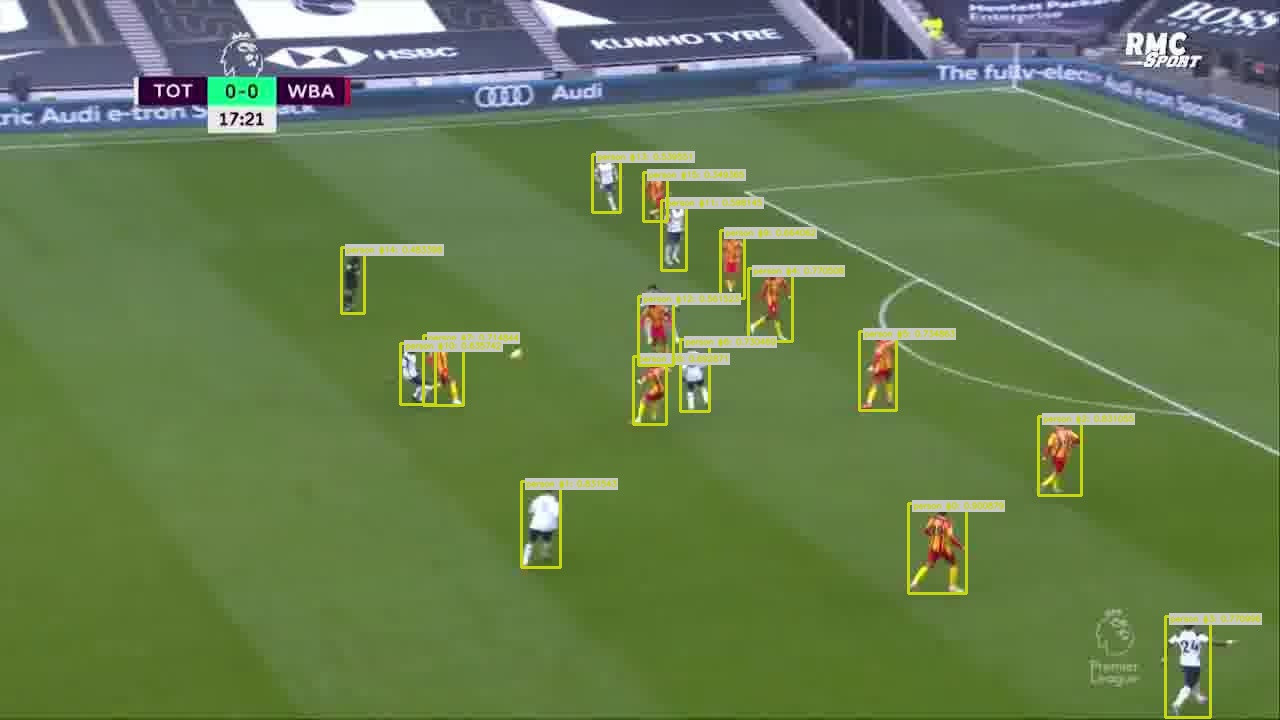

In [8]:
# Utility function for displaying image
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
# Get YOLO v7 image result
img_bbox = wf.get_image_with_graphics(task_id=yolo7_id)

# Display in Colab
img_bbox = cv2.cvtColor(img_bbox, cv2.COLOR_BGR2RGB)
imshow(img_bbox)

## -Google Colab ONLY- Save your YOLO v7 model in your Google Drive account



In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# Uncomment and insert the correct "folder name" in the following path
#%cp /content/foler_name/weights/best.pt /content/gdrive/MyDrive

## -Google Colab ONLY- Download directly your custom model

In [ ]:
#from google.colab import files

# Uncomment and insert the correct "folder name" in the following path
#files.download('/content/folder_name/weights/best.pt')